### Melborne House Price Prediction

### Outline
#### Problem Definition : 
-Build a model that predicts house price based on
 numerical and categorical variables
 
 
#### Data

- Obtained from Kaggle. Dataset contains approx. 14000 listings and 21 colums.
- Data Inspection and Cleaning
- Missing Value imputation
- Pandas Profilling Report

#### EDA

- Price variation analysis by different categorical variables
- Initial Feature selection

#### Machine Learning

- Assumptions Check (Y should be normally distributed)
- Feature Selection
- Scaling the Data
- Build a Linear Regression Model
- Feature Importance
- Model Evaluation 

#### Model Validation and Interpretation
- Decile Analysis


In [4]:
#Importing the necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('melb_data.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [6]:
df.shape

(13580, 21)

In [7]:
import datetime

In [8]:
from datetime import datetime

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [60]:
#Missing Values percentage
df.isnull().sum()/13580

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Postcode         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.004566
Landsize         0.000000
BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.100810
Lattitude        0.000000
Longtitude       0.000000
Regionname       0.000000
Propertycount    0.000000
dtype: float64

In [ ]:
#BuildingArea , YearBuilt , CouncilArea have lot of missing values so we deal with them first

In [13]:
# Creating Pandas Profilling
from pandas_profiling import ProfileReport

In [14]:
profile = ProfileReport(df)
profile.to_file("profiling_report.html")

In [ ]:
#Results from pandas profiling
# Car has 7.6% zeros. Car refers to number of car spots. So we leave it as is
# Landsize has 14.3% zeros. This is not possible.We can replace 0 with mean of landsize

In [10]:
df['Landsize'].mean()
df['Landsize'].replace(to_replace=0,value=df['Landsize'].mean(),inplace=True)

In [11]:
#Building area has too many missing values (47%). So we create missing value indicator feature and drop buildingArea
df['is_bldg_area_null'] = df['BuildingArea'].isnull().astype(int)
df = df.drop(columns=['BuildingArea'])

In [12]:
#Similarly, YearBuilt has too many missing values
df['is_YearBuilt_null'] =  df['YearBuilt'].isnull().astype(int)
df = df.drop(columns=['YearBuilt'])

In [13]:
df['CouncilArea'].value_counts()

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Maroondah              80
Knox                   80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Moorabool               1
Unavailable             1
Name: CouncilArea, dtype: int64

In [14]:
#Council area has 10% missing values so we impute it with the mode of the column
df['CouncilArea'] = df['CouncilArea'].fillna('Moreland')

In [15]:
#Engineering datetime variables from the Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Dayofweek'] = df['Date'].dt.dayofweek

In [16]:
df = df.drop(columns=['Date'])

In [17]:
# seperate categorical and continuous variables
df_conti_vars = df.loc[:, (df.dtypes == 'float64') | (df.dtypes == 'int64')]
df_cat_vars = df.loc[:, (df.dtypes == 'object')]

#### Analyzing continuous variables

In [18]:
df_conti_vars.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,is_bldg_area_null,is_YearBuilt_null,Year,Month,Dayofweek
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,638.148739,-37.809203,144.995216,7454.417378,0.474963,0.395803,2016.533432,6.701988,3.968778
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3984.288642,0.079260,0.103916,4378.581772,0.499391,0.489040,0.498899,2.758499,1.925919
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,-38.182550,144.431810,249.000000,0.000000,0.000000,2016.000000,1.000000,0.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,305.000000,-37.856822,144.929600,4380.000000,0.000000,0.000000,2016.000000,5.000000,3.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,558.416127,-37.802355,145.000100,6555.000000,0.000000,0.000000,2017.000000,7.000000,5.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,-37.756400,145.058305,10331.000000,1.000000,1.000000,2017.000000,9.000000,5.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,-37.408530,145.526350,21650.000000,1.000000,1.000000,2017.000000,12.000000,6.000000


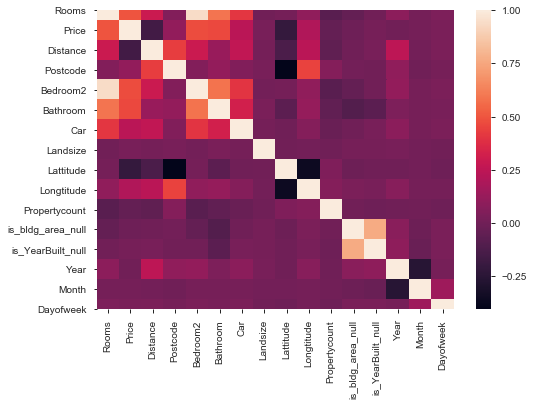

In [32]:
sns.heatmap(df_conti_vars.corr())

In [19]:
df_conti_vars.corr()['Price'].sort_values(ascending=False)

Price                1.000000
Rooms                0.496634
Bedroom2             0.475951
Bathroom             0.467038
Car                  0.238979
Longtitude           0.203656
Postcode             0.107867
Dayofweek            0.032374
Landsize             0.024063
is_YearBuilt_null    0.019108
Month                0.016374
Year                 0.003993
is_bldg_area_null   -0.006971
Propertycount       -0.042153
Distance            -0.162522
Lattitude           -0.212934
Name: Price, dtype: float64

In [38]:
#Variables with smallest correlation : Dayofweek , Landsize, is_YearBuilt_null,Month, Year
#df_conti_vars.drop(columns=['Landsize','Dayofweek','is_YearBuilt_null','Month','Year','is_bldg_area_null'],inplace=True)

In [20]:
df_cat_vars.describe()

,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,13580
unique,314,13378,3,5,268,33,8
top,Reservoir,53 William St,h,S,Nelson,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,2532,4695


In [ ]:
#SellerG and Address have very high cardinality. Address can probably be dropped because we
# can analyze regions. 

#### Analyzing Categorical Variables

In [70]:
df_cat_vars.describe()

,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,13580
unique,314,13378,3,5,268,33,8
top,Reservoir,13 Robinson St,h,S,Nelson,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,2532,4695


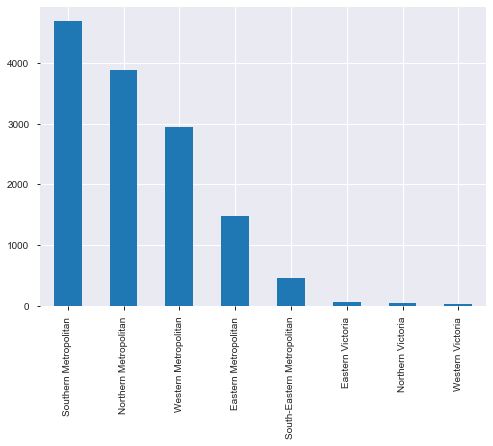

In [46]:
df_cat_vars['Regionname'].value_counts().plot(kind='bar')

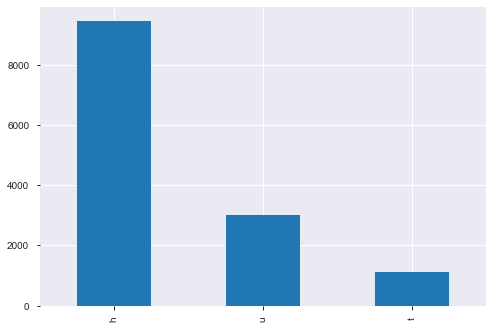

In [48]:
df_cat_vars['Type'].value_counts().plot(kind='bar')

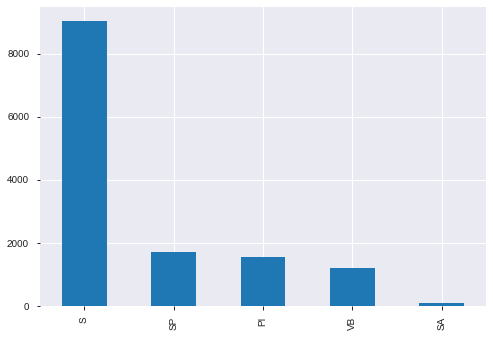

In [49]:
df_cat_vars['Method'].value_counts().plot(kind='bar')

In [57]:
df_cat_vars['SellerG'].value_counts()

Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Boutique            1
CASTRAN             1
Vic                 1
Propertyau          1
Bowman              1
Name: SellerG, Length: 268, dtype: int64

In [21]:
df_final = pd.concat([df_conti_vars,df_cat_vars],axis = 1)

In [22]:
df_final.head(2)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,...,Year,Month,Dayofweek,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,...,2016,3,5,Abbotsford,85 Turner St,h,S,Biggin,Yarra,Northern Metropolitan
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,...,2016,4,5,Abbotsford,25 Bloomburg St,h,S,Biggin,Yarra,Northern Metropolitan


In [23]:
#saving to final dataframe for further analysis
df_final.to_csv('final')

### EDA: Analyzing Price variation with categorical variables

In [52]:
df_final = pd.read_csv('final')

In [29]:
df_final.head()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,...,Year,Month,Dayofweek,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname
0,0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,...,2016,3,5,Abbotsford,85 Turner St,h,S,Biggin,Yarra,Northern Metropolitan
1,1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,...,2016,4,5,Abbotsford,25 Bloomburg St,h,S,Biggin,Yarra,Northern Metropolitan
2,2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,...,2017,4,0,Abbotsford,5 Charles St,h,SP,Biggin,Yarra,Northern Metropolitan
3,3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,...,2017,4,0,Abbotsford,40 Federation La,h,PI,Biggin,Yarra,Northern Metropolitan
4,4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,...,2016,4,2,Abbotsford,55a Park St,h,VB,Nelson,Yarra,Northern Metropolitan


In [53]:
df_final.drop(columns=['Unnamed: 0'],inplace=True)

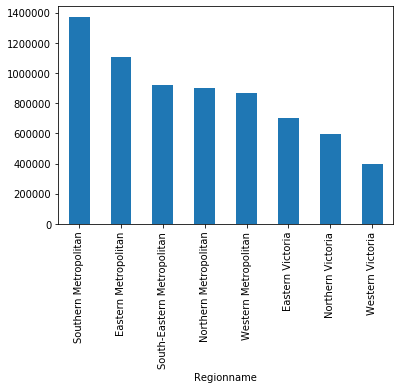

In [31]:
#Analyzing Price by Regionname
df_final.groupby('Regionname')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

In [ ]:
#Southern and Eastern Metropolitan areas are the most expensive regions

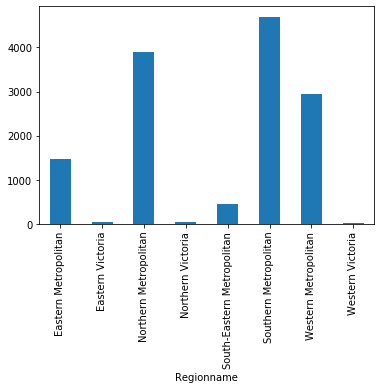

In [32]:
df_final.groupby('Regionname')['Price'].count().plot(kind='bar')

In [33]:
#Analyzing percentage of house listings in every region as a proportion of
# total listings
df_final.groupby('Regionname')['Price'].count().sort_values(ascending=False)/df_final.shape[0]

Regionname
Southern Metropolitan         0.345729
Northern Metropolitan         0.286451
Western Metropolitan          0.217084
Eastern Metropolitan          0.108321
South-Eastern Metropolitan    0.033137
Eastern Victoria              0.003903
Northern Victoria             0.003019
Western Victoria              0.002356
Name: Price, dtype: float64

In [ ]:
#Southern, Northern and Western Metropolitan are the top 3 regions 
#accounting for 84% of the total transactions.

In [42]:
#Analyzing SellerG
df_final['SellerG'].nunique()

268

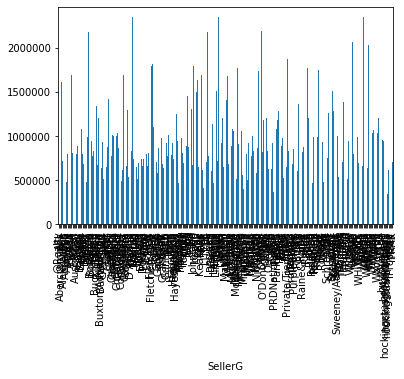

In [47]:
df_final.groupby('SellerG')['Price'].mean().plot(kind='bar')

In [119]:
df_final.groupby(['Regionname','SellerG'])['Price'].count()

Regionname            SellerG      
Eastern Metropolitan  ASL                2
                      Allens             1
                      Appleby            2
                      Assisi             1
                      Barry            293
                                      ... 
Western Victoria      Ray                1
                      Reliance           3
                      Ryder              5
                      YPA                5
                      hockingstuart      9
Name: Price, Length: 500, dtype: int64

In [54]:
#For the purpose of modeling, we can drop SellerG as it has too many
#unique values
df_final.drop(columns=['SellerG'],inplace=True)

In [55]:
#Analyzing variable : Suburb
df_final['Suburb'].nunique()

314

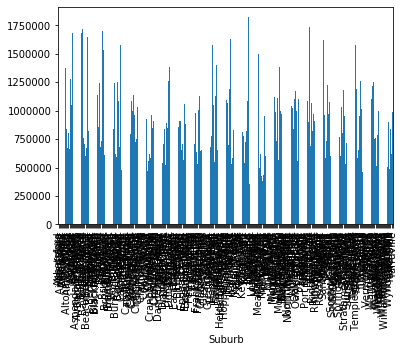

In [49]:
df_final.groupby('Suburb')['Price'].mean().plot(kind='bar')

In [56]:
#We can transform the Suburb variable based on average price by suburb
df_final['Suburb'] = df_final.groupby('Suburb')['Price'].transform('mean')

In [57]:
df_final['Address'].nunique()

13378

In [58]:
#Address has many distinct values. Can be dropped
df_final.drop(columns=['Address'],inplace=True)

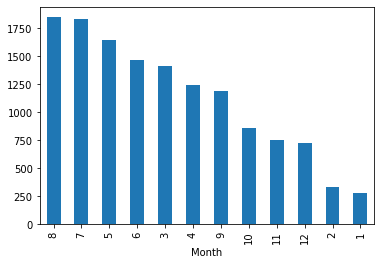

In [106]:
#Analyzing Price variation with datetime variables
df_final.groupby('Month')['Price'].count().sort_values(ascending = False).plot(kind='bar')

In [ ]:
#Months of August, July and May have the highest sales activity

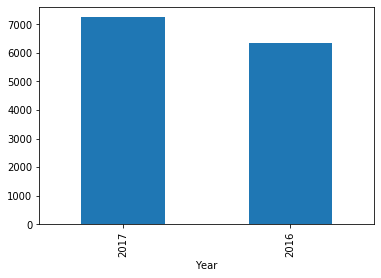

In [107]:
df_final.groupby('Year')['Price'].count().sort_values(ascending = False).plot(kind='bar')

In [ ]:
#Number of transactions is greater in 2017 compared to 2016

In [63]:
df_final['Type'].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [66]:
df_final['Method'].value_counts()

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

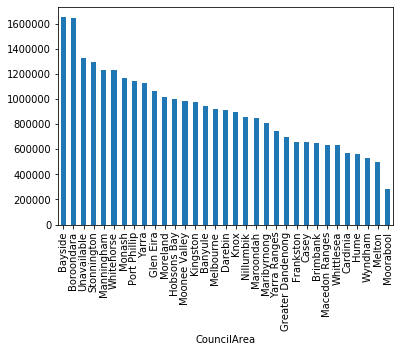

In [73]:
#Analyzing average price by Council Area
df_final.groupby('CouncilArea')['Price'].mean().sort_values(ascending=False).\
plot(kind='bar')

In [78]:
df_final.groupby(['Regionname','CouncilArea'])['Price'].mean()

Regionname                  CouncilArea      
Eastern Metropolitan        Banyule              9.832436e+05
                            Boroondara           2.200000e+06
                            Knox                 8.957555e+05
                            Manningham           1.236242e+06
                            Maroondah            8.510250e+05
                            Monash               1.364347e+06
                            Moreland             1.186870e+06
                            Nillumbik            8.872222e+05
                            Whitehorse           1.197974e+06
Eastern Victoria            Cardinia             5.731250e+05
                            Casey                7.305455e+05
                            Frankston            5.744375e+05
                            Manningham           9.000000e+05
                            Moreland             7.575556e+05
                            Yarra Ranges         7.602801e+05
Northern Metropolitan   

In [79]:
#Similarly to Suburb,We can transform the CouncilArea variable based on average price by CouncilArea
df_final['CouncilArea'] = df_final.groupby('CouncilArea')['Price'].transform('mean')

In [139]:
df_final['Car'].value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [140]:
df_final.isnull().sum()

Rooms                 0
Price                 0
Distance              0
Postcode              0
Bedroom2              0
Bathroom              0
Car                  62
Landsize              0
Lattitude             0
Longtitude            0
Propertycount         0
is_bldg_area_null     0
is_YearBuilt_null     0
Year                  0
Month                 0
Dayofweek             0
Suburb                0
Type                  0
Method                0
CouncilArea           0
Regionname            0
dtype: int64

In [143]:
df_final['Car'] = df_final['Car'].fillna(0)

In [144]:
df_final.drop(columns=['Suburb','CouncilArea'],inplace=True)

In [145]:
df_final.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,is_bldg_area_null,is_YearBuilt_null,Year,Month,Dayofweek,Type,Method,Regionname
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0,1,1,2016,3,5,h,S,Northern Metropolitan
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0,0,0,2016,4,5,h,S,Northern Metropolitan
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0,0,0,2017,4,0,h,SP,Northern Metropolitan
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0,1,1,2017,4,0,h,PI,Northern Metropolitan
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0,0,0,2016,4,2,h,VB,Northern Metropolitan


In [146]:
df_final.to_csv('DatasetforML')

### Machine Learning

In [293]:
#Load Dataset prepared for ML
melborne = pd.read_csv('DatasetforML')
melborne.head()
melborne.drop(columns=['Unnamed: 0'],inplace=True)

#### Assumptions Check: 
- Very first assumtion is that all the variables should be normally distributed, however that can't be possible
- However we have to be atleast strict about the dependant Y variable
 
 Notes:
- If we get skewed data, then we have to transform the data and there are multiple methods to go about it
- Most commonly used and which works on most of the data is log transformation
- Ideally we should do this for each of the independant variables as well, however it will depend on amount of data and the amount of analytical rigour
- In no case we can proceed if dependant variable is not normal/near to normal distributed

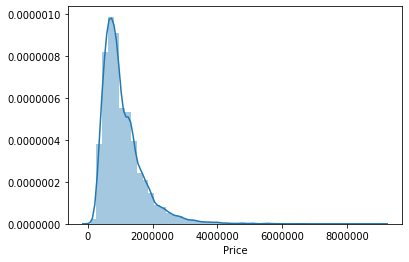

In [111]:
sns.distplot(melborne['Price'])
plt.show()

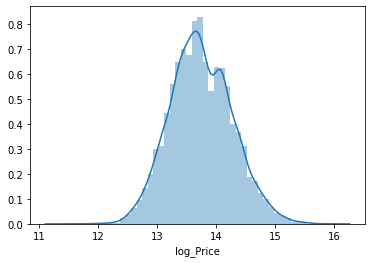

In [294]:
# apply log transformation: log is re-scalling the data and making the distribution normal
melborne['log_Price'] = np.log(melborne['Price'])

# Distribution of variables
sns.distplot(melborne['log_Price'])
plt.show()

In [150]:
melborne.corr()['log_Price'].sort_values(ascending=False)

log_Price            1.000000
Price                0.927698
Rooms                0.559824
Bedroom2             0.536716
Bathroom             0.455706
Car                  0.251118
Longtitude           0.240917
Postcode             0.092621
is_YearBuilt_null    0.047578
Dayofweek            0.033999
Year                 0.017817
Month                0.017237
Landsize             0.015496
is_bldg_area_null    0.012242
Propertycount       -0.063999
Distance            -0.153938
Lattitude           -0.224606
Name: log_Price, dtype: float64

In [295]:
#We can drop variables with correlation less than 0.1: that is, 
# Postcode,is_YearBuilt_null,Dayofweek,Year,Month,Landsize,is_bldg_area_null
melborne.drop(columns=['Postcode','is_YearBuilt_null','Dayofweek','Year','Month','Landsize','is_bldg_area_null'],
             inplace=True)

In [296]:
melborne.shape

(13580, 13)

In [297]:
y = melborne['log_Price']
X = pd.get_dummies(melborne.drop(columns=['Price','log_Price']),drop_first=True)

In [298]:
y.shape

(13580,)

In [299]:
X.shape

(13580, 21)

### Scaling the data

In [300]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [301]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [302]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

In [303]:
X_train_scaled_df.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount,Type_t,Type_u,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,-0.975949,-0.104619,-0.937652,-0.771613,-1.649287,0.718759,0.476566,-1.524749,-0.301909,-0.535750,...,-0.082159,-0.378107,-0.312832,-0.062144,-0.628807,-0.055562,-0.188756,-0.731974,-0.526225,-0.051429
1,0.067311,-0.610748,0.088296,-0.771613,-0.618851,0.678226,0.009590,0.324343,-0.301909,-0.535750,...,-0.082159,-0.378107,-0.312832,-0.062144,1.590312,-0.055562,-0.188756,-0.731974,-0.526225,-0.051429
2,-0.975949,-0.003393,-0.937652,0.671671,-0.618851,-0.959836,0.499581,0.084510,3.312258,-0.535750,...,-0.082159,-0.378107,-0.312832,-0.062144,-0.628807,-0.055562,-0.188756,1.366168,-0.526225,-0.051429
3,1.110571,-0.813200,1.114244,0.671671,0.411586,-0.058218,0.292163,0.882274,-0.301909,-0.535750,...,-0.082159,-0.378107,-0.312832,-0.062144,-0.628807,-0.055562,-0.188756,1.366168,-0.526225,-0.051429
4,0.067311,0.215929,0.088296,-0.771613,0.411586,-1.100183,0.637955,0.084510,-0.301909,1.866543,...,-0.082159,-0.378107,-0.312832,-0.062144,-0.628807,-0.055562,-0.188756,1.366168,-0.526225,-0.051429


### Building a Linear Regression Model 

In [305]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import cross_val_score

In [273]:
model=LinearRegression()
model.fit(X_train_scaled_df,y_train)
y_pred = model.predict(X_test_scaled)

### Feature Importance

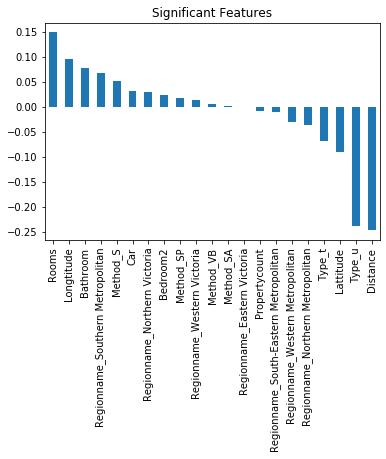

In [308]:
pd.Series(model.coef_,X.columns).sort_values(ascending=False).plot(kind='bar').set_title('Significant Features');

In [ ]:
#Strong predictors of Price appear to be number of rooms, Longitude, No. of Bathrooms
#Latitude, Type_U and Distance

### Model Evaluation
    a.  RMSE: Root Mean Square Error
    b.  R2 Score

In [325]:
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score:',r2_score(y_test,y_pred))

RMSE: 0.2825495634441655
R2 score: 0.7141307527800235


### Model Coefficients

In [311]:
model.coef_

array([ 0.14862959, -0.24726187,  0.02329201,  0.07654665,  0.03215551,
       -0.08973912,  0.09480679, -0.00782368, -0.06841361, -0.23969905,
        0.05197423,  0.00232163,  0.01658638,  0.00602297, -0.0014465 ,
       -0.03690272,  0.02997816, -0.01067048,  0.06814992, -0.02970339,
        0.01337019])

In [312]:
model.intercept_

13.744318865204999

### Model Validation and Interpretation
##### Decile Analysis
- Will be performed on test dataset

In [234]:
X_test.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount,Type_t,Type_u,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1061,3,11.2,3.0,2.0,3.0,-37.9287,144.9920,10579.0,0,0,...,0,0,0,0,0,0,0,1,0,0
6482,2,1.9,2.0,1.0,1.0,-37.8091,144.9520,2230.0,0,1,...,0,0,0,0,1,0,0,0,0,0
8395,3,6.1,3.0,1.0,0.0,-37.8718,144.9767,13240.0,0,1,...,0,1,0,0,0,0,0,1,0,0
4659,3,9.9,3.0,2.0,1.0,-37.7152,144.9346,7485.0,1,0,...,0,0,1,0,1,0,0,0,0,0
7386,2,9.1,2.0,1.0,2.0,-37.8331,144.8715,984.0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [328]:
y_test.index

Int64Index([ 1061,  6482,  8395,  4659,  7386,  6607,  8094,  4590, 13475,
            10318,
            ...
            12471,  3544,   519,  6378,  9457,  6750,  5863,   227,  9609,
             5605],
           dtype='int64', length=4482)

In [329]:
y_pred

array([14.24458768, 13.31891601, 13.52851613, ..., 14.22724889,
       14.35244273, 13.47811497])

In [332]:
y_pred_df = pd.DataFrame(np.round(np.exp(y_pred)),index=y_test.index,columns=['Predicted Price'])
y_pred_df.head()

,Predicted Price
1061,1535839.0
6482,608600.0
8395,750516.0
4659,648540.0
7386,754758.0


In [340]:
y_test_df = pd.DataFrame(np.exp(y_test)).rename(columns={'log_Price':'Actual Price'})
y_test_df.head()

,Actual Price
1061,2600000.0
6482,620000.0
8395,1000000.0
4659,430000.0
7386,392250.0


In [341]:
test = pd.concat([X_test,y_test_df,y_pred_df],axis=1)
test.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount,Type_t,Type_u,...,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Actual Price,Predicted Price
1061,3,11.2,3.0,2.0,3.0,-37.9287,144.9920,10579.0,0,0,...,0,0,0,0,0,1,0,0,2600000.0,1535839.0
6482,2,1.9,2.0,1.0,1.0,-37.8091,144.9520,2230.0,0,1,...,0,0,1,0,0,0,0,0,620000.0,608600.0
8395,3,6.1,3.0,1.0,0.0,-37.8718,144.9767,13240.0,0,1,...,0,0,0,0,0,1,0,0,1000000.0,750516.0
4659,3,9.9,3.0,2.0,1.0,-37.7152,144.9346,7485.0,1,0,...,1,0,1,0,0,0,0,0,430000.0,648540.0
7386,2,9.1,2.0,1.0,2.0,-37.8331,144.8715,984.0,0,0,...,0,0,0,0,0,0,1,0,392250.0,754758.0


In [344]:
# create the 10 groups in the data
test['Deciles'] = pd.qcut(test['Predicted Price'], 10, labels = False)

# Decile Analysis for test data
#Predicted_avg = test[['Deciles', 'Predicted Price']].groupby(test.Deciles).mean().sort_index(ascending = False)['Predicted Price']
#Actual_avg = test[['Deciles', 'log_Price']].groupby(test.Deciles).mean().sort_index(ascending = False)['log_Price']
#Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()



In [348]:
predicted_avg = test.groupby('Deciles')[['Predicted Price']].mean()
actual_avg = test.groupby('Deciles')[['Actual Price']].mean()
Decile_analysis_test_df = pd.concat([predicted_avg, actual_avg], axis = 1).reset_index()

In [352]:
round(Decile_analysis_test_df)

,Deciles,Predicted Price,Actual Price
0,0,423356.0,473148.0
1,1,578438.0,572422.0
2,2,678595.0,687358.0
3,3,772862.0,807079.0
4,4,880081.0,901203.0
5,5,998494.0,1033127.0
6,6,1113505.0,1147142.0
7,7,1286513.0,1374239.0
8,8,1507278.0,1607973.0
9,9,2008503.0,2185166.0


In [353]:
# write the data into the file
Decile_analysis_test.to_csv('Decile_analysis_test.csv')